### 실무테크닉100 교재

In [1]:
##############    주문 분석   #################

# customer_master.csv       : 고객데이터, 이름, 성별 등
# item_master.csv           : 취급하는 상품 데이터, 상품명, 가격 등
# transaction_1.csv         : 구매내역 데이터
# transaction_2.csv          : 위와 연결된 구매내역 분할 데이터
# transaction_detail_1.csv   : 구매내역 상세 데이터
# transaction_detail_2.csv   : 위와 연결된 분할 데이터

In [2]:
# 경고(warning) 비표시
import warnings
warnings.filterwarnings('ignore')

In [3]:
import pandas as pd
customer_master = pd.read_csv('Data/customer_master.csv')
customer_master.head()

,customer_id,customer_name,registration_date,email,gender,age,birth,pref
0,IK152942,김서준,2019-01-01 0:25,hirata_yuujirou@example.com,M,29,1990-06-10,대전광역시
1,TS808488,김예준,2019-01-01 1:13,tamura_shiori@example.com,F,33,1986-05-20,인천광역시
2,AS834628,김도윤,2019-01-01 2:00,hisano_yuki@example.com,F,63,1956-01-02,광주광역시
3,AS345469,김시우,2019-01-01 4:48,tsuruoka_kaoru@example.com,M,74,1945-03-25,인천광역시
4,GD892565,김주원,2019-01-01 4:54,oouchi_takashi@example.com,M,54,1965-08-05,울산광역시


In [4]:
item_master = pd.read_csv('Data/item_master.csv')
item_master.head()

,item_id,item_name,item_price
0,S001,PC-A,50000
1,S002,PC-B,85000
2,S003,PC-C,120000
3,S004,PC-D,180000
4,S005,PC-E,210000


In [5]:
transaction_1 = pd.read_csv('Data/transaction_1.csv')
transaction_1.head()

,transaction_id,price,payment_date,customer_id
0,T0000000113,210000,2019-02-01 01:36:57,PL563502
1,T0000000114,50000,2019-02-01 01:37:23,HD678019
2,T0000000115,120000,2019-02-01 02:34:19,HD298120
3,T0000000116,210000,2019-02-01 02:47:23,IK452215
4,T0000000117,170000,2019-02-01 04:33:46,PL542865


In [6]:
transaction_2 = pd.read_csv('Data/transaction_2.csv')
transaction_2.head()

,transaction_id,price,payment_date,customer_id
0,T0000005113,295000,2019-06-15 07:20:27,TS169261
1,T0000005114,50000,2019-06-15 07:35:47,HI599892
2,T0000005115,85000,2019-06-15 07:56:36,HI421757
3,T0000005116,50000,2019-06-15 08:40:55,OA386378
4,T0000005117,120000,2019-06-15 08:44:23,TS506913


In [7]:
transaction_detail_1 = pd.read_csv('Data/transaction_detail_1.csv')
transaction_detail_1.head()

,detail_id,transaction_id,item_id,quantity
0,0,T0000000113,S005,1
1,1,T0000000114,S001,1
2,2,T0000000115,S003,1
3,3,T0000000116,S005,1
4,4,T0000000117,S002,2


In [8]:
transaction_detail_2 = pd.read_csv('Data/transaction_detail_2.csv')
transaction_detail_2.head()

,detail_id,transaction_id,item_id,quantity
0,5000,T0000004870,S002,3
1,5001,T0000004871,S003,1
2,5002,T0000004872,S001,2
3,5003,T0000004873,S004,1
4,5004,T0000004874,S003,2


In [9]:
transaction = pd.concat ([transaction_1, transaction_2])
transaction

,transaction_id,price,payment_date,customer_id
0,T0000000113,210000,2019-02-01 01:36:57,PL563502
1,T0000000114,50000,2019-02-01 01:37:23,HD678019
2,T0000000115,120000,2019-02-01 02:34:19,HD298120
3,T0000000116,210000,2019-02-01 02:47:23,IK452215
4,T0000000117,170000,2019-02-01 04:33:46,PL542865
...,...,...,...,...
1781,T0000006894,180000,2019-07-31 21:20:44,HI400734
1782,T0000006895,85000,2019-07-31 21:52:48,AS339451
1783,T0000006896,100000,2019-07-31 23:35:25,OA027325
1784,T0000006897,85000,2019-07-31 23:39:35,TS624738


In [10]:
transaction_detail = pd.concat ([transaction_detail_1, transaction_detail_2])
transaction_detail.head()

,detail_id,transaction_id,item_id,quantity
0,0,T0000000113,S005,1
1,1,T0000000114,S001,1
2,2,T0000000115,S003,1
3,3,T0000000116,S005,1
4,4,T0000000117,S002,2


In [11]:
transaction.to_csv('Data/transaction.csv')
transaction_detail.to_csv('Data/transaction_detail.csv')

In [12]:
print(len(transaction_1))
print(len(transaction_2))
print(len(transaction))

5000
1786
6786


In [13]:
print(len(transaction_detail_1))
print(len(transaction_detail_2))
print(len(transaction_detail))

5000
2144
7144


In [14]:
## 매출 데이터 Merge

join_data = pd.merge(transaction_detail, transaction[['transaction_id', 'payment_date', 'customer_id']], on = 'transaction_id', how = 'left')
join_data.head()

,detail_id,transaction_id,item_id,quantity,payment_date,customer_id
0,0,T0000000113,S005,1,2019-02-01 01:36:57,PL563502
1,1,T0000000114,S001,1,2019-02-01 01:37:23,HD678019
2,2,T0000000115,S003,1,2019-02-01 02:34:19,HD298120
3,3,T0000000116,S005,1,2019-02-01 02:47:23,IK452215
4,4,T0000000117,S002,2,2019-02-01 04:33:46,PL542865


In [15]:
print(len(transaction))
print(len(transaction_detail)) # how = left 에 의해서 detail기준
print(len(join_data))

6786
7144
7144


In [16]:
join_data_customer = pd.merge(join_data, customer_master, on = 'customer_id', how = 'left')
join_data_customer.head()

,detail_id,transaction_id,item_id,quantity,payment_date,customer_id,customer_name,registration_date,email,gender,age,birth,pref
0,0,T0000000113,S005,1,2019-02-01 01:36:57,PL563502,김태경,2019-01-07 14:34,imoto_yoshimasa@example.com,M,30,1989-07-15,대전광역시
1,1,T0000000114,S001,1,2019-02-01 01:37:23,HD678019,김영웅,2019-01-27 18:00,mifune_rokurou@example.com,M,73,1945-11-29,서울특별시
2,2,T0000000115,S003,1,2019-02-01 02:34:19,HD298120,김강현,2019-01-11 8:16,yamane_kogan@example.com,M,42,1977-05-17,광주광역시
3,3,T0000000116,S005,1,2019-02-01 02:47:23,IK452215,김주한,2019-01-10 5:07,ikeda_natsumi@example.com,F,47,1972-03-17,인천광역시
4,4,T0000000117,S002,2,2019-02-01 04:33:46,PL542865,김영빈,2019-01-25 6:46,kurita_kenichi@example.com,M,74,1944-12-17,광주광역시


In [17]:
join_data_customer.to_csv('Data/join_customer.csv', encoding = 'utf-8-sig')

In [18]:
join_data_item = pd.merge(join_data, item_master, on = 'item_id', how = 'left')
join_data_item.head()

,detail_id,transaction_id,item_id,quantity,payment_date,customer_id,item_name,item_price
0,0,T0000000113,S005,1,2019-02-01 01:36:57,PL563502,PC-E,210000
1,1,T0000000114,S001,1,2019-02-01 01:37:23,HD678019,PC-A,50000
2,2,T0000000115,S003,1,2019-02-01 02:34:19,HD298120,PC-C,120000
3,3,T0000000116,S005,1,2019-02-01 02:47:23,IK452215,PC-E,210000
4,4,T0000000117,S002,2,2019-02-01 04:33:46,PL542865,PC-B,85000


In [19]:
join_data_item.to_csv('Data/join_data_item.csv', encoding = 'utf-8-sig')

In [20]:
join_data_item['price'] = join_data_item['quantity']*join_data_item['item_price']

In [21]:
join_data_item

,detail_id,transaction_id,item_id,quantity,payment_date,customer_id,item_name,item_price,price
0,0,T0000000113,S005,1,2019-02-01 01:36:57,PL563502,PC-E,210000,210000
1,1,T0000000114,S001,1,2019-02-01 01:37:23,HD678019,PC-A,50000,50000
2,2,T0000000115,S003,1,2019-02-01 02:34:19,HD298120,PC-C,120000,120000
3,3,T0000000116,S005,1,2019-02-01 02:47:23,IK452215,PC-E,210000,210000
4,4,T0000000117,S002,2,2019-02-01 04:33:46,PL542865,PC-B,85000,170000
...,...,...,...,...,...,...,...,...,...
7139,7139,T0000006894,S004,1,2019-07-31 21:20:44,HI400734,PC-D,180000,180000
7140,7140,T0000006895,S002,1,2019-07-31 21:52:48,AS339451,PC-B,85000,85000
7141,7141,T0000006896,S001,2,2019-07-31 23:35:25,OA027325,PC-A,50000,100000
7142,7142,T0000006897,S002,1,2019-07-31 23:39:35,TS624738,PC-B,85000,85000


In [22]:
join_data_item.to_csv('Data/join_data_item.csv', encoding = 'utf-8-sig')

In [23]:
join_data_item['price'].sum()

971135000

In [24]:
join_data_item.sum()['price']

971135000

In [25]:
join_data_item.isnull().sum()

detail_id         0
transaction_id    0
item_id           0
quantity          0
payment_date      0
customer_id       0
item_name         0
item_price        0
price             0
dtype: int64

In [26]:
join_data_item.describe()

,detail_id,quantity,item_price,price
count,7144.000000,7144.000000,7144.000000,7144.000000
mean,3571.500000,1.199888,121698.628219,135937.150056
std,2062.439494,0.513647,64571.311830,68511.453297
min,0.000000,1.000000,50000.000000,50000.000000
25%,1785.750000,1.000000,50000.000000,85000.000000
50%,3571.500000,1.000000,102500.000000,120000.000000
75%,5357.250000,1.000000,187500.000000,210000.000000
max,7143.000000,4.000000,210000.000000,420000.000000


In [27]:
join_data_item['payment_date'].min()

'2019-02-01 01:36:57'

In [28]:
join_data_item['payment_date'].max()

'2019-07-31 23:41:38'

In [29]:
join_data_item.dtypes

detail_id          int64
transaction_id    object
item_id           object
quantity           int64
payment_date      object
customer_id       object
item_name         object
item_price         int64
price              int64
dtype: object

In [30]:
join_data_item['payment_date'] = pd.to_datetime(join_data_item['payment_date'])

In [31]:
join_data_item.dtypes

detail_id                  int64
transaction_id            object
item_id                   object
quantity                   int64
payment_date      datetime64[ns]
customer_id               object
item_name                 object
item_price                 int64
price                      int64
dtype: object

In [32]:
join_data_item['payment_month'] = join_data_item['payment_date'].dt.strftime('%Y%m')
join_data_item.head()

,detail_id,transaction_id,item_id,quantity,payment_date,customer_id,item_name,item_price,price,payment_month
0,0,T0000000113,S005,1,2019-02-01 01:36:57,PL563502,PC-E,210000,210000,201902
1,1,T0000000114,S001,1,2019-02-01 01:37:23,HD678019,PC-A,50000,50000,201902
2,2,T0000000115,S003,1,2019-02-01 02:34:19,HD298120,PC-C,120000,120000,201902
3,3,T0000000116,S005,1,2019-02-01 02:47:23,IK452215,PC-E,210000,210000,201902
4,4,T0000000117,S002,2,2019-02-01 04:33:46,PL542865,PC-B,85000,170000,201902


In [33]:
join_data_item.groupby('payment_month')['price'].sum()

payment_month
201902    160185000
201903    160370000
201904    160510000
201905    155420000
201906    164030000
201907    170620000
Name: price, dtype: int64

In [34]:
a = join_data_item.groupby('payment_month')['price'].sum()
a = pd.DataFrame(a)
a = a.reset_index(drop = False)
a

,payment_month,price
0,201902,160185000
1,201903,160370000
2,201904,160510000
3,201905,155420000
4,201906,164030000
5,201907,170620000


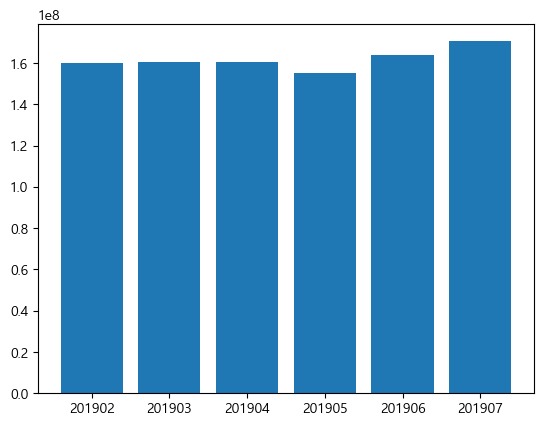

In [35]:
import matplotlib.pyplot as plt

plt.rc('font', family='malgun gothic')
plt.rcParams['axes.unicode_minus'] = False

plt.bar(a['payment_month'],a['price'])
plt.show()

In [36]:
join_data_item.groupby('item_name')['price'].sum()

item_name
PC-A    152150000
PC-B    151725000
PC-C    122640000
PC-D    162000000
PC-E    382620000
Name: price, dtype: int64

In [37]:
join_data_item.groupby('item_name')['price'].count()

item_name
PC-A    2143
PC-B    1429
PC-C     929
PC-D     857
PC-E    1786
Name: price, dtype: int64

In [38]:
join_data_item.groupby('item_name')['quantity'].sum()

item_name
PC-A    3043
PC-B    1785
PC-C    1022
PC-D     900
PC-E    1822
Name: quantity, dtype: int64

In [40]:
table_a = pd.pivot_table(join_data_item, index = 'item_name',
                         columns = 'payment_month', values = ['quantity'],
                         aggfunc = 'sum' )
table_a

quantity                                   
payment_month   201902 201903 201904 201905 201906 201907
item_name                                                
PC-A               483    520    518    497    520    505
PC-B               297    300    276    298    282    332
PC-C               165    159    183    171    182    162
PC-D               173    143    135    144    160    145
PC-E               285    305    309    280    302    341

<Axes: xlabel='None-payment_month', ylabel='item_name'>

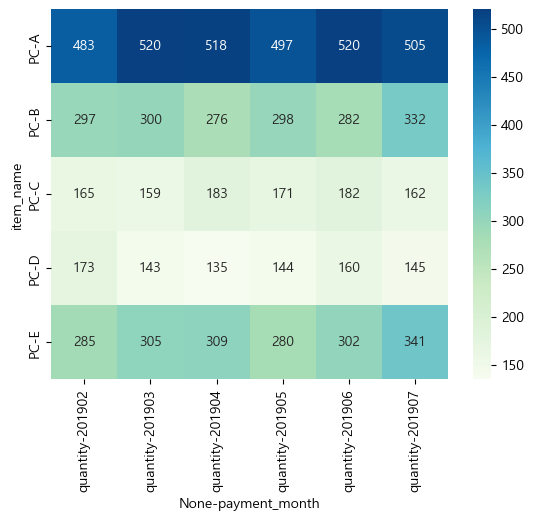

In [42]:
import seaborn as sns

sns.heatmap(table_a, annot = True, fmt = 'd', cmap = 'GnBu')


In [43]:
join_data_item.groupby(['payment_month','item_name'])[['price','quantity']].sum()

price  quantity
payment_month item_name                    
201902        PC-A       24150000       483
              PC-B       25245000       297
              PC-C       19800000       165
              PC-D       31140000       173
              PC-E       59850000       285
201903        PC-A       26000000       520
              PC-B       25500000       300
              PC-C       19080000       159
              PC-D       25740000       143
              PC-E       64050000       305
201904        PC-A       25900000       518
              PC-B       23460000       276
              PC-C       21960000       183
              PC-D       24300000       135
              PC-E       64890000       309
201905        PC-A       24850000       497
              PC-B       25330000       298
              PC-C       20520000       171
              PC-D       25920000       144
              PC-E       58800000       280
201906        PC-A       26000000       520
              PC-B       23970000       282
              PC-C       21840000       182
              PC-D       28800000       160
              PC-E       63420000       302
201907        PC-A       25250000       505
              PC-B       28220000       332
              PC-C       19440000       162
              PC-D       26100000       145
              PC-E       71610000       341

In [44]:
table_a2 = pd.pivot_table(join_data_item, index = 'item_name',
                         columns = 'payment_month', values = ['price','quantity'],
                         aggfunc = 'sum' )
table_a2

price                                                    \
payment_month    201902    201903    201904    201905    201906    201907   
item_name                                                                   
PC-A           24150000  26000000  25900000  24850000  26000000  25250000   
PC-B           25245000  25500000  23460000  25330000  23970000  28220000   
PC-C           19800000  19080000  21960000  20520000  21840000  19440000   
PC-D           31140000  25740000  24300000  25920000  28800000  26100000   
PC-E           59850000  64050000  64890000  58800000  63420000  71610000   

              quantity                                     
payment_month   201902 201903 201904 201905 201906 201907  
item_name                                                  
PC-A               483    520    518    497    520    505  
PC-B               297    300    276    298    282    332  
PC-C               165    159    183    171    182    162  
PC-D               173    143    135    144    160    145  
PC-E               285    305    309    280    302    341

In [49]:
table_a3 = pd.pivot_table(join_data_item, index =  'payment_month',
                         columns = 'item_name', values = 'price',
                         aggfunc = 'sum' )
table_a3

item_name,PC-A,PC-B,PC-C,PC-D,PC-E
payment_month,,,,,
201902,24150000,25245000,19800000,31140000,59850000
201903,26000000,25500000,19080000,25740000,64050000
201904,25900000,23460000,21960000,24300000,64890000
201905,24850000,25330000,20520000,25920000,58800000
201906,26000000,23970000,21840000,28800000,63420000
201907,25250000,28220000,19440000,26100000,71610000


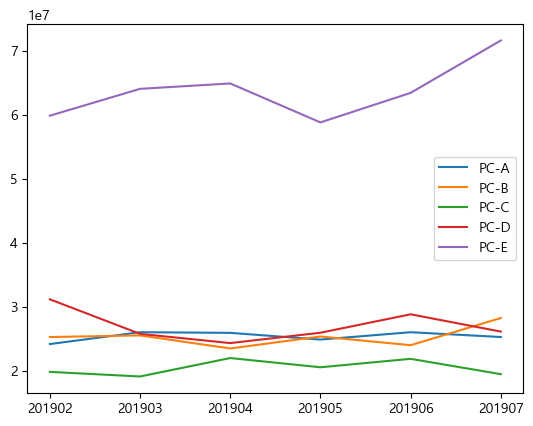

In [64]:
plt.plot(list(table_a3.index), table_a3['PC-A'], label = 'PC-A')
plt.plot(list(table_a3.index), table_a3['PC-B'], label = 'PC-B')
plt.plot(list(table_a3.index), table_a3['PC-C'], label = 'PC-C')
plt.plot(list(table_a3.index), table_a3['PC-D'], label = 'PC-D')
plt.plot(list(table_a3.index), table_a3['PC-E'], label = 'PC-E')
plt.legend()
plt.show()

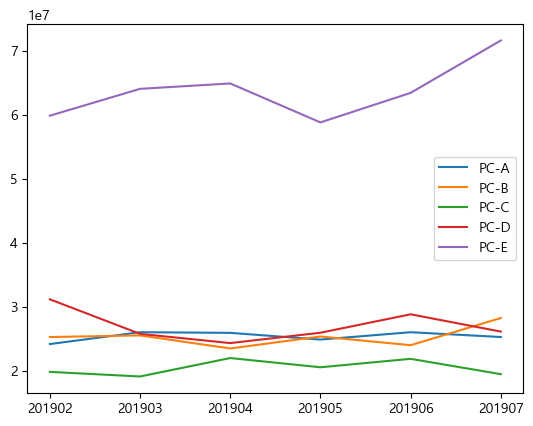

In [65]:
products = join_data_item['item_name'].unique(); products.sort()
for i in products:
    plt.plot(list(table_a3.index), table_a3[i], label = i)
plt.legend()
plt.show()

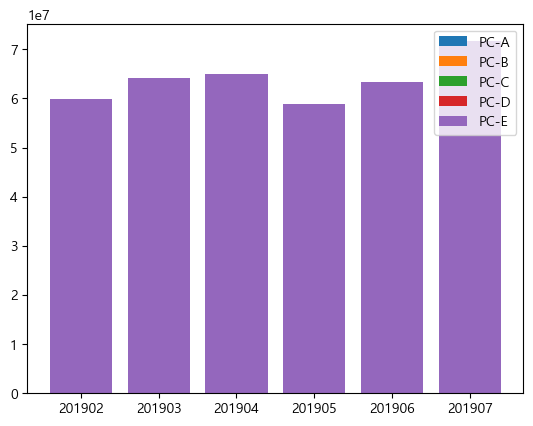

In [66]:
products = join_data_item['item_name'].unique(); products.sort()
for i in products:
    plt.bar(list(table_a3.index), table_a3[i], label = i)
plt.legend()
plt.show()